In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import legacy as legacy_optimzers

# Load the dataset
data_path = 'eICU_age.npy'
age_data = np.load(data_path).astype(np.float32)
age_data = age_data.view(np.float32).reshape(age_data.shape + (-1,))

# Normalize the age data to the range [0, 1]
age_data = (age_data - age_data.min()) / (age_data.max() - age_data.min())

# Hyperparameters
latent_dim = 100
batch_size = 64
epochs = 10000
sample_interval = 100

# Build the generator
def build_generator():
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Build the discriminator
def build_discriminator():
    model = Sequential()
    model.add(Dense(512, input_dim=1))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Compile the models
#optimizer = Adam(0.0002, 0.5)
optimizer=legacy_optimzers.Adam (0.0002, 0.5)

discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

generator = build_generator()
generator.compile(loss='binary_crossentropy', optimizer=optimizer)

# Combine generator and discriminator into the GAN model
z = tf.keras.Input(shape=(latent_dim,))
generated_ages = generator(z)
discriminator.trainable = False
validity = discriminator(generated_ages)
combined = tf.keras.Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)

# Training the GAN
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
    # Train the discriminator
    idx = np.random.randint(0, age_data.shape[0], batch_size)
    real_ages = age_data[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_ages = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_ages, valid)
    d_loss_fake = discriminator.train_on_batch(generated_ages, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = combined.train_on_batch(noise, valid)

    # Print the progress
    if epoch % sample_interval == 0:
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")

# Generate age data for comparison
noise = np.random.normal(0, 1, (1000, latent_dim))
generated_ages = generator.predict(noise)

# Rescale the data back to the original range
generated_ages = generated_ages * (age_data.max() - age_data.min()) + age_data.min()

# Plot the results
plt.figure(figsize=(10, 5))
plt.hist(age_data, bins=50, alpha=0.6, label='Real Data')
plt.hist(generated_ages, bins=50, alpha=0.6, label='Generated Data')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 6ms/step
4200 [D loss: 0.6931691765785217 | D accuracy: 49.21875] [G loss: 0.6930853128433228]
2/2 [==============================] - 0s 5ms/step
4300 [D loss: 0.6932074427604675 | D accuracy: 46.09375] [G loss: 0.6931019425392151]
2/2 [==============================] - 0s 8ms/step
4400 [D loss: 0.6934574246406555 | D accuracy: 37.5] [G loss: 0.692136287689209]
2/2 [==============================] - 0s 8ms/step
4500 [D loss: 0.6934613883495331 | D accuracy: 48.4375] [G loss: 0.6933920383453369]
2/2 [==============================] - 0s 6ms/step
4600 [D loss: 0.6939206123352051 | D accuracy: 38.28125] [G loss: 0.6927869319915771]
2/2 [==============================] - 0s 8ms/step
4700 [D loss: 0.6932469606399536 | D accuracy: 45.3125] [G loss: 0.6932899951934814]
2/2 [==============================] - 0s 6ms/step
4800 [D loss: 0.6950536668300629 | D accuracy: 51.5625] [G loss: 0.6850916147232056

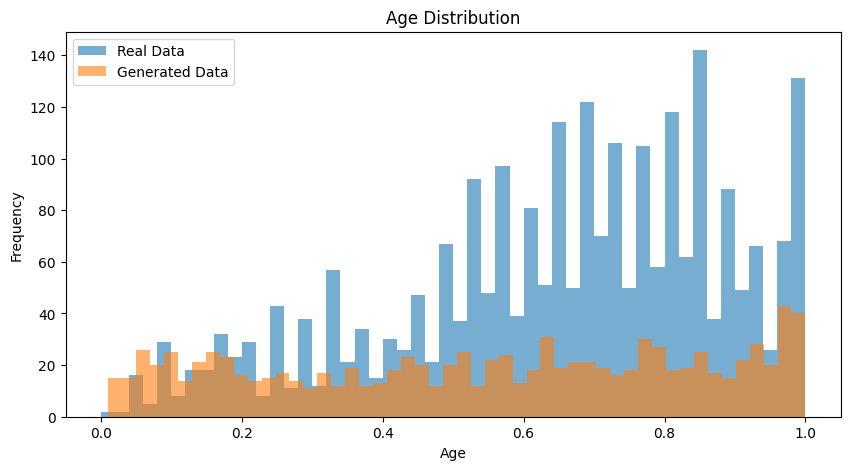

In [2]:
plt.figure(figsize=(10, 5))
plt.hist(age_data, bins=50, alpha=0.6, label='Real Data')
plt.hist(generated_ages, bins=50, alpha=0.6, label='Generated Data')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()